In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_classification(n_samples=100_000,n_features=20,n_informative=2,n_redundant=10,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.99,random_state=42
)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [4]:
lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb,cv=2,method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb,cv=2,method="sigmoid")

clf_list = [
    (lr,"Logistic"),
    (gnb,"Naive Bayes"),
    (gnb_isotonic,"Naive Bayes + Isotonic"),
    (gnb_sigmoid,"Naive Bayes + Sigmoid"),
]

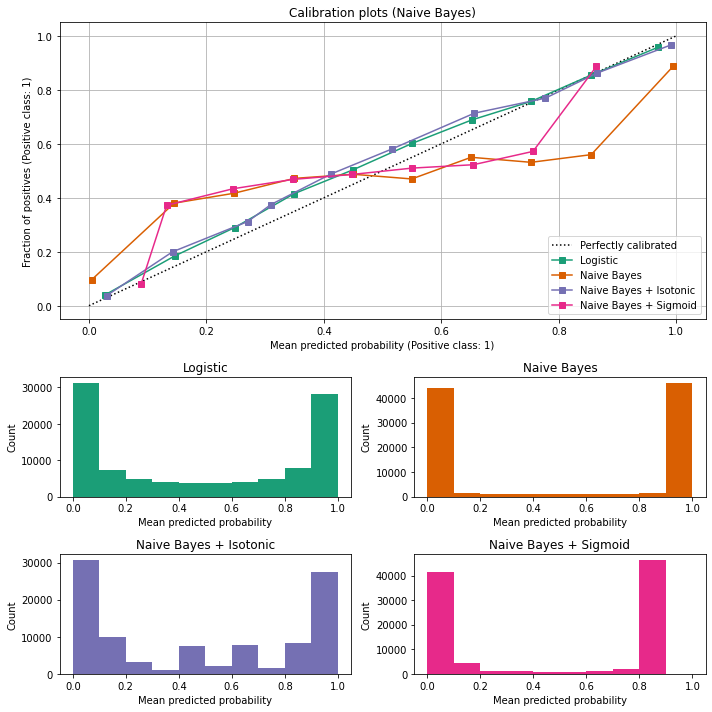

In [8]:
fig = plt.figure(figsize=(10,10))
gs = GridSpec(4,2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2,:2])
calibration_displays={}

for i,(clf,name) in enumerate(clf_list):
    clf.fit(X_train,y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name]=display
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

#histogramy

grid_positions = [(2,0),(2,1),(3,0),(3,1)]
for i,(_,name) in enumerate(clf_list):
    row,col = grid_positions[i]
    ax = fig.add_subplot(gs[row,col])
    ax.hist(
        calibration_displays[name].y_prob,
        range=(0,1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name,xlabel="Mean predicted probability",ylabel="Count")
plt.tight_layout()
plt.show()